In [17]:
import pandas as pd
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import decomposition

from sklearn.impute import KNNImputer

In [18]:
def cross_val_predict(model, k, X, y) -> Tuple[np.array, np.array, np.array]:

    kfold = StratifiedKFold(n_splits=k)
    model_ = cp.deepcopy(model)
    acc_score = []
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X,y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        pred_values = model_.predict(test_X)
        acc = accuracy_score(pred_values , test_y)
        acc_score.append(acc)
        predicted_classes = np.append(predicted_classes, pred_values)
        avg_acc_score = sum(acc_score)/k

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    print('accuracy of each fold - {}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))

    return actual_classes, predicted_classes, predicted_proba

In [3]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
    plt.show()
    plt.savefig('health-confusion-matrix.png')

(2032, 4060)
(2032,)
accuracy of each fold - [0.7745098039215687, 0.8088235294117647, 0.8325123152709359, 0.8177339901477833, 0.7142857142857143, 0.7832512315270936, 0.7733990147783252, 0.7044334975369458, 0.7931034482758621, 0.7192118226600985]
Avg accuracy : 0.7721264367816093


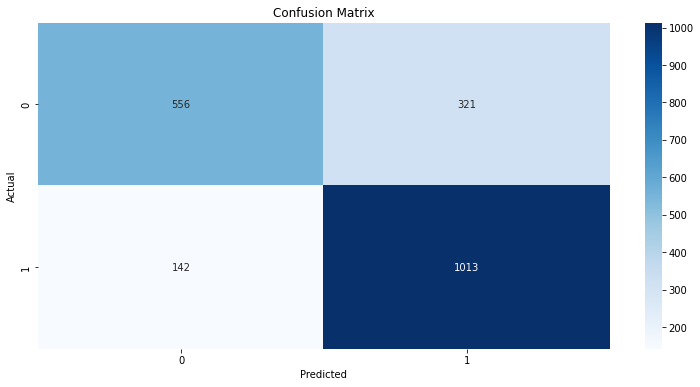

<Figure size 432x288 with 0 Axes>

In [22]:
X = pd.read_csv('mfcc/X.csv')
X = X.transpose()
y = pd.read_csv('mfcc/y_sex.csv')

X=X.iloc[:].values
y=y.iloc[:].values.ravel()

imputer = KNNImputer(n_neighbors=2, weights="uniform")
X=imputer.fit_transform(X)

print(X.shape)
print(y.shape)


model = svm.SVC(gamma='scale')
k=10

actual_classes, predicted_classes, _ = cross_val_predict(model, k, X, y)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])